In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install flaml
!pip install openpyxl

import tensorflow as tf
from sklearn.model_selection import train_test_split
from flaml import AutoML
import pandas as pd
import numpy as np

RaisinData = pd.read_excel('Raisin_Dataset.xlsx')
RaisinData

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [4]:
dictForClasses = {k:v for k, v in zip(list(set(RaisinData.iloc[:, -1].tolist())), 
                    list(range(len(list(set(RaisinData.iloc[:, -1].tolist()))))))}

In [5]:
dictForClasses

{'Besni': 1, 'Kecimen': 0}

In [6]:
def SubClasses(x):
    classes = dictForClasses[x['Class']]
    return classes

ListForClasses = RaisinData.apply(SubClasses, axis=1)
RaisinData['Class'] = ListForClasses

In [7]:
RaisinData

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1


In [8]:
X = np.array(RaisinData.iloc[:, 0:8])
y = RaisinData.iloc[:, -1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)
model = AutoML()
model.fit(X_train, y_train, task='classification', metric='accuracy', time_budget=10)

[flaml.automl: 06-03 22:44:19] {2373} INFO - task = classification
[flaml.automl: 06-03 22:44:19] {2375} INFO - Data split method: stratified
[flaml.automl: 06-03 22:44:19] {2379} INFO - Evaluation method: cv
[flaml.automl: 06-03 22:44:19] {2448} INFO - Minimizing error metric: 1-accuracy
[flaml.automl: 06-03 22:44:19] {2586} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 06-03 22:44:19] {2878} INFO - iteration 0, current learner lgbm
[flaml.automl: 06-03 22:44:20] {3009} INFO - Estimated sufficient time budget=870s. Estimated necessary time budget=20s.
[flaml.automl: 06-03 22:44:20] {3061} INFO -  at 0.1s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 06-03 22:44:20] {2878} INFO - iteration 1, current learner lgbm
[flaml.automl: 06-03 22:44:20] {3061} INFO -  at 0.2s,	estimator lgbm's best error=0.0000,	best estimator lgbm's best error=0.0000
[flaml.automl: 06-03 22

In [10]:
print('Best ML Model:', model.best_estimator)
print('Best hyperparmeter config:', model.best_config)
print('Best accuracy on validation data: %f'%(1-model.best_loss))
print('Training duration of best run: %f s'%(model.best_config_train_time))

Best ML Model: lgbm
Best hyperparmeter config: {'n_estimators': 4, 'num_leaves': 4, 'min_child_samples': 20, 'learning_rate': 0.09999999999999995, 'log_max_bin': 8, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 1.0}
Best accuracy on validation data: 1.000000
Training duration of best run: 0.007655 s


In [11]:
class RaisinModel(tf.keras.Model):
    def __init__(self):
        super(RaisinModel, self).__init__()
        self.B1 = tf.keras.layers.BatchNormalization()
        self.D1 = tf.keras.layers.Dense(16, activation='relu')
        self.D2 = tf.keras.layers.Dense(2, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2())
        
    def call(self, x):
        x = self.B1(x)
        x = self.D1(x)
        y = self.D2(x)
        return y
    
TFmodel = RaisinModel()
TFmodel.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
               metrics=['sparse_categorical_accuracy'])

history = TFmodel.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, validation_freq=1)

TFmodel.summary()

Epoch 1/50
23/23 [==============================] - 1s 13ms/step - loss: 0.6770 - sparse_categorical_accuracy: 0.6583 - val_loss: 4.1123 - val_sparse_categorical_accuracy: 0.0056
Epoch 2/50
23/23 [==============================] - 0s 3ms/step - loss: 0.5004 - sparse_categorical_accuracy: 0.8569 - val_loss: 0.5100 - val_sparse_categorical_accuracy: 0.7944
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3924 - sparse_categorical_accuracy: 0.9208 - val_loss: 0.2146 - val_sparse_categorical_accuracy: 0.9889
Epoch 4/50
23/23 [==============================] - 0s 3ms/step - loss: 0.3146 - sparse_categorical_accuracy: 0.9556 - val_loss: 0.1441 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 0.2672 - sparse_categorical_accuracy: 0.9653 - val_loss: 0.1315 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 0.2166 - sparse_categorical_accuracy:

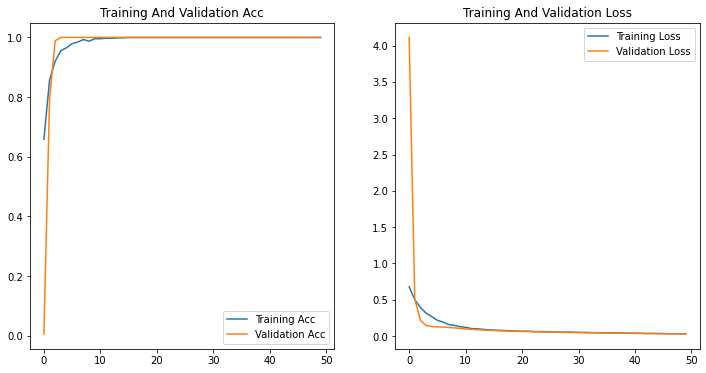

In [12]:
import matplotlib.pyplot as plt

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Acc')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')

plt.legend()
plt.show()